# 图像金字塔
## 目标
- 学习图像金字塔
- 使用图像创建一个新水果：“橘子苹果”
- 将要学习的函数有： cv2.pyrUp()， cv2.pyrDown()。

## 16.1 原理
1.一般情况下，我们要处理是一副具有固定分辨率的图像。但是有些情况下，
我们需要对同一图像的不同分辨率的子图像进行处理。比如，我们要在一幅图
像中查找某个目标，比如脸，我们不知道目标在图像中的尺寸大小。这种情况
下，我们需要创建一组图像，这些图像是具有不同分辨率的原始图像。我
们把这组图像叫做图像金字塔（简单来说就是同一图像的不同分辨率的子图集
合）。如果我们把最大的图像放在底部，最小的放在顶部，看起来像一座金字塔，故而得名图像金字塔。  

2.有两类图像金字塔：高斯金字塔和拉普拉斯金字塔。
- 高斯金字塔的顶部是通过将底部图像中的连续的行和列去除得到的。顶部图像中的每个像素值等于下一层图像中 5 个像素的高斯加权平均值。这样操作一次一个 MxN 的图像就变成了一个 M/2xN/2 的图像。所以这幅图像的面积就变为原来图像面积的四分之一。这被称为 Octave。连续进行这样的操作我们就会得到一个分辨率不断下降的图像金字塔。
- 我们可以使用函数cv2.pyrDown() 和 cv2.pyrUp() 构建图像金字塔。函数 cv2.pyrDown() 从一个高分辨率大尺寸的图像向上构建一个金子塔（尺寸变小，分辨率降低）。
![](图像金字塔.png)

## 16.2高斯金字塔
高斯金字塔中的高阶（低分辨率）是通过去除低阶（高分辨率）图像中连续的行和列形成的，我们可以使用cv2.pyrDown()和cv2.pyrUp()函数找到高斯金字塔。  


## **cv.pyrDown()效果**  
高斯金字塔操作中向下采样  
其使用的高斯核为：
$$ kernel = \frac{1}{256}
\left[\begin{matrix}
1 & 4 & 6 & 4 & 1\\
4 & 16 & 24 & 16 & 4\\
6 & 24 & 36 & 24 & 6\\
4 & 16 & 24 & 16 & 4\\
1 & 4 & 6 & 4 & 1
\end{matrix}\right]
$$
dst = cv2.pyrDown(src[,st[,dstsize[,borderType]]])
- dst:目标图像
- src:原始图像
- borderType:边界类型，默认BORDER_DEFAULT  
默认情况下，输出图像的大小长宽为原图像的一半

(304, 283)
(152, 142)
(76, 71)
(38, 36)


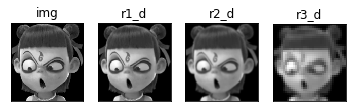

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("zha_head.png",0)
r1_d = cv2.pyrDown(img)
r2_d = cv2.pyrDown(r1_d)
r3_d = cv2.pyrDown(r2_d)

print(img.shape)
print(r1_d.shape)
print(r2_d.shape)
print(r3_d.shape)
plt.subplot(1,4,1),plt.imshow(img,cmap = 'gray')
plt.title("img"),plt.xticks([]),plt.yticks([])
plt.subplot(1,4,2),plt.imshow(r1_d,cmap = 'gray')
plt.title("r1_d"),plt.xticks([]),plt.yticks([])
plt.subplot(1,4,3),plt.imshow(r2_d,cmap = 'gray')
plt.title("r2_d"),plt.xticks([]),plt.yticks([])
plt.subplot(1,4,4),plt.imshow(r3_d,cmap = 'gray')
plt.title("r3_d"),plt.xticks([]),plt.yticks([])
plt.show()

可见，线下采样后，图像分辨率降低

### <font color=blue>pyrDown()原理 </font>  

我们来看一下数组究竟发生了生么：
    

In [13]:
img_1 = np.random.randint(0,10,size=100,dtype=np.uint8) #注意数据类型
img_1 = img_1.reshape(10,10) # 构造为10*10 的矩阵
img_1

array([[2, 5, 8, 5, 1, 5, 6, 0, 9, 4],
       [9, 8, 0, 3, 7, 0, 0, 8, 1, 5],
       [0, 9, 4, 8, 7, 8, 1, 9, 1, 2],
       [4, 0, 7, 6, 9, 9, 4, 6, 3, 0],
       [0, 7, 9, 1, 5, 5, 9, 2, 7, 0],
       [8, 9, 3, 8, 9, 6, 9, 0, 3, 1],
       [1, 3, 1, 7, 4, 5, 7, 6, 1, 6],
       [5, 7, 5, 2, 7, 3, 6, 5, 8, 4],
       [4, 0, 5, 9, 1, 0, 5, 6, 8, 4],
       [3, 2, 2, 1, 6, 3, 2, 2, 0, 9]], dtype=uint8)

使用cv2.pyrDown()的结果

In [14]:
r1 = cv2.pyrDown(img_1)
r1

array([[6, 5, 4, 3, 4],
       [5, 5, 6, 5, 3],
       [5, 6, 6, 6, 3],
       [5, 5, 5, 5, 4],
       [3, 4, 4, 4, 5]], dtype=uint8)

手动生成高斯核

In [17]:
kernel = np.array([[1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]])
kernel

array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

In [18]:
kernel = kernel/256
kernel

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

高斯核与原图像进行卷积

In [26]:
dst = cv2.filter2D(img_1,-1,kernel)
dst

array([[6, 6, 5, 4, 4, 3, 3, 4, 4, 4],
       [6, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [5, 5, 5, 6, 6, 5, 5, 4, 3, 3],
       [4, 5, 5, 6, 6, 6, 6, 5, 3, 3],
       [5, 5, 6, 6, 6, 6, 6, 4, 3, 3],
       [5, 5, 5, 6, 6, 6, 6, 4, 3, 3],
       [5, 5, 5, 5, 5, 6, 5, 5, 4, 4],
       [4, 4, 4, 5, 4, 4, 5, 5, 5, 5],
       [3, 3, 4, 4, 4, 3, 4, 5, 5, 5],
       [3, 3, 4, 4, 4, 3, 4, 4, 5, 5]], dtype=uint8)

除去偶数行和偶数列(去除编号为奇数的行和列)

In [27]:
dst_2 = np.zeros((5,5),dtype=np.uint8)
for i in range(10):
    if i%2==0:
        for j in range(10):
            if j%2==0:
                dst_2[int(i/2),int(j/2)] = dst[i,j]
dst_2

array([[6, 5, 4, 3, 4],
       [5, 5, 6, 5, 3],
       [5, 6, 6, 6, 3],
       [5, 5, 5, 5, 4],
       [3, 4, 4, 4, 5]], dtype=uint8)

该结果与使用cv2.pyrDown()的结果对比：


In [28]:
dst_2 ==r1

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## **二、cv2.pyrUp()效果**

(304, 283)
(608, 566)
(1216, 1132)
(2432, 2264)


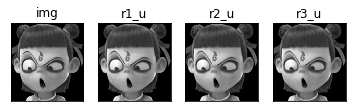

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("zha_head.png",0)
r1_u = cv2.pyrUp(img)
r2_u = cv2.pyrUp(r1_u)
r3_u = cv2.pyrUp(r2_u)

print(img.shape)
print(r1_u.shape)
print(r2_u.shape)
print(r3_u.shape)

plt.subplot(1,4,1),plt.imshow(img,cmap = 'gray')
plt.title("img"),plt.xticks([]),plt.yticks([])
plt.subplot(1,4,2),plt.imshow(r1_u,cmap = 'gray')
plt.title("r1_u"),plt.xticks([]),plt.yticks([])
plt.subplot(1,4,3),plt.imshow(r2_u,cmap = 'gray')
plt.title("r2_u"),plt.xticks([]),plt.yticks([])
plt.subplot(1,4,4),plt.imshow(r3_u,cmap = 'gray')
plt.title("r3_u"),plt.xticks([]),plt.yticks([])
plt.show()

### <font color=blue>pyrDown()原理 </font>  

In [44]:
dst_2

array([[6, 5, 4, 3, 4],
       [5, 5, 6, 5, 3],
       [5, 6, 6, 6, 3],
       [5, 5, 5, 5, 4],
       [3, 4, 4, 4, 5]], dtype=uint8)

In [45]:
up_1 = cv2.pyrUp(dst_2)
up_1

array([[6, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 4, 4, 4, 4],
       [5, 5, 5, 5, 6, 5, 5, 4, 3, 3],
       [5, 5, 6, 6, 6, 6, 5, 4, 3, 3],
       [5, 5, 6, 6, 6, 6, 5, 4, 3, 3],
       [5, 5, 5, 6, 6, 6, 5, 5, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 4, 4],
       [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
       [3, 4, 4, 4, 4, 4, 4, 5, 5, 5],
       [3, 4, 4, 4, 4, 4, 4, 5, 5, 5]], dtype=uint8)

下面进行原理上的计算  
向上采样时，每个像素的右侧，下方分别插入零行和零列

In [46]:
dst_3 = np.zeros((10,10),dtype=np.uint8)
for i in range(10):
    if i%2==0:
        for j in range(10):
            if j%2==0:
                dst_3[i,j] =dst_2[int(i/2),int(j/2)]
dst_3

array([[6, 0, 5, 0, 4, 0, 3, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 5, 0, 6, 0, 5, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 6, 0, 6, 0, 6, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 5, 0, 5, 0, 5, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 4, 0, 4, 0, 4, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

向下采样时使用的高斯滤波器对图像进行滤波  
由于面积扩大了四倍，且增加的部分都是0元素，整体均值会降为原来的1/4  
故为了确保像素值区间在向上采样后与原始图像保持一致，需将高斯滤波器的系数乘以4

In [47]:
kernel = np.array([[1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]])
kernel

array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

In [48]:
kernel = kernel/256*4
kernel

array([[0.015625, 0.0625  , 0.09375 , 0.0625  , 0.015625],
       [0.0625  , 0.25    , 0.375   , 0.25    , 0.0625  ],
       [0.09375 , 0.375   , 0.5625  , 0.375   , 0.09375 ],
       [0.0625  , 0.25    , 0.375   , 0.25    , 0.0625  ],
       [0.015625, 0.0625  , 0.09375 , 0.0625  , 0.015625]])

进行高斯滤波

In [49]:
dst_4 = cv2.filter2D(dst_3,-1,kernel)
dst_4


array([[6, 5, 5, 5, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 6, 5, 5, 4, 3, 3],
       [5, 5, 6, 6, 6, 6, 5, 4, 3, 3],
       [5, 5, 6, 6, 6, 6, 5, 4, 3, 3],
       [5, 5, 5, 6, 6, 6, 5, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [3, 4, 4, 4, 4, 4, 4, 4, 5, 5],
       [3, 4, 4, 4, 4, 4, 4, 4, 5, 5]], dtype=uint8)

In [50]:
dst_4 == up_1

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True],
       [ True,  True,  True, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True]])

### <font color=blue>采样可逆性研究 </font>    
一幅图像先向下采样，再向上采样，虽然会恢复原始大小，图像看起来相似，但是像素值是不一样的

(304, 283)
(256, 256)


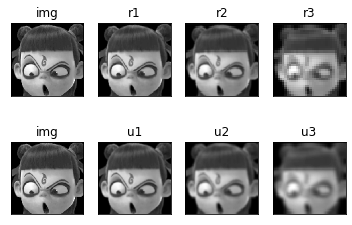

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("zha_head.png",0)
print(img.shape)
img = img[0:256,0:256]
print(img.shape)
r1 = cv2.pyrDown(img)
r2 = cv2.pyrDown(r1)
r3 = cv2.pyrDown(r2)

u1 = cv2.pyrUp(r1)
u2 = cv2.pyrUp(r2)
u3 = cv2.pyrUp(r3)

title = ['img','r1','r2','r3','img','u1','u2','u3']
image = [img, r1, r2, r3, img, u1, u2, u3]
for i in range(8):
    plt.subplot(2,4,i+1),plt.imshow(image[i],cmap = 'gray')
    plt.title(title[i]),plt.xticks([]),plt.yticks([])

plt.show()

图像看起来很相似，但是像素值是不一样的

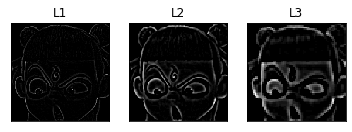

In [58]:
L1 = cv2.subtract(img,u1)
L2 = cv2.subtract(r1,u2)
L3 = cv2.subtract(r2,u3)

# L1 = img-u1
# L2 = r1-u2
# L3 = r2-u3

plt.subplot(1,3,1),plt.imshow(L1,cmap = 'gray')
plt.title("L1"),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(L2,cmap = 'gray')
plt.title("L2"),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(L3,cmap = 'gray')
plt.title("L3"),plt.xticks([]),plt.yticks([])
plt.show()

In [60]:
img_1-dst_4


array([[252,   0,   3,   0, 253,   1,   2, 252,   5,   0],
       [  4,   3, 251, 254,   2, 252, 252,   4, 253,   1],
       [251,   4, 255,   3,   1,   3, 252,   5, 254, 255],
       [255, 251,   1,   0,   3,   3, 255,   2,   0, 253],
       [251,   2,   3, 251, 255, 255,   4, 254,   4, 253],
       [  3,   4, 254,   2,   3,   0,   4, 252, 255, 253],
       [252, 254, 252,   2, 255,   0,   2,   2, 253,   2],
       [  1,   3,   1, 254,   3, 255,   2,   1,   4,   0],
       [  1, 252,   1,   5, 253, 252,   1,   2,   3, 255],
       [  0, 254, 254, 253,   2, 255, 254, 254, 251,   4]], dtype=uint8)

可以看出如果直接相减，这里出现负数，在uint8格式下，会出现以上效果，有时间考虑使用subtract()函数，即相减之后附属的地方全都为0

In [62]:
cv2.subtract(img_1,dst_4)

array([[0, 0, 3, 0, 0, 1, 2, 0, 5, 0],
       [4, 3, 0, 0, 2, 0, 0, 4, 0, 1],
       [0, 4, 0, 3, 1, 3, 0, 5, 0, 0],
       [0, 0, 1, 0, 3, 3, 0, 2, 0, 0],
       [0, 2, 3, 0, 0, 0, 4, 0, 4, 0],
       [3, 4, 0, 2, 3, 0, 4, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 2, 2, 0, 2],
       [1, 3, 1, 0, 3, 0, 2, 1, 4, 0],
       [1, 0, 1, 5, 0, 0, 1, 2, 3, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 4]], dtype=uint8)

## 16.3拉普拉斯金字塔

拉普拉斯金字塔是由高斯金字塔构成的，没有专门的函数，拉普拉金字塔的图像看起来就像边界图，其中很多像素都是 0。他们经常被用在图像压缩中。  
Laplacian金字塔中的层次是由高斯金字塔中的层次与高斯金字塔中其上层次的扩展后的层次之差形成的![](Laplacian金字塔.png)

使用cv2.pyrDown()和cv2.pyrUp()构造拉普拉斯金字塔  
<font color=blue size=4>拉普拉斯金字塔的作用在于能够恢复高分辨率的图像</font>

(448, 640)
(224, 320)
(112, 160)
(56, 80)
(112, 160)
(224, 320)
(448, 640)


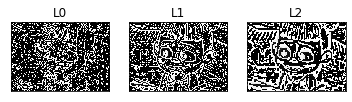

In [14]:
img = cv2.imread("nazha.jpeg",0)
img = img[0:448,0:640]  # 调整图片大小为64的整数倍

r0 = img
r1 = cv2.pyrDown(r0)
r2 = cv2.pyrDown(r1)
r3 = cv2.pyrDown(r2)
print(r0.shape)
print(r1.shape)
print(r2.shape)
print(r3.shape)

L0 = r0-cv2.pyrUp(r1)
L1 = r1-cv2.pyrUp(r2)
L2 = r2-cv2.pyrUp(r3)
print(L2.shape)
print(L1.shape)
print(L0.shape)



plt.subplot(1,3,1),plt.imshow(L0,cmap = 'gray')
plt.title("L0"),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2),plt.imshow(L1,cmap = 'gray')
plt.title("L1"),plt.xticks([]),plt.yticks([])
plt.subplot(1,3,3),plt.imshow(L2,cmap = 'gray')
plt.title("L2"),plt.xticks([]),plt.yticks([])
plt.show()

## 16.4 使用金字塔进行图像融合
- 利用图像金字塔进行图像融合，即实现自然过渡，又避免损失清晰度，加载两张要处理的图片，注意n曾金字塔，要求图像大小是2的n次方的整数![](图像融合原理1.png)
- 图像金字塔的一个应用是图像融合。例如，在图像缝合中，你需要将两图叠在一起，但是由于连接区域图像像素的不连续性，整幅图的效果看起来会很差。这时图像金字塔就可以排上用场了，他可以帮你实现无缝连接。这里的一个经典案例就是将两个水果融合成一个，看看下图也许你就明白我在讲什么了。![](图像融合原理2.png)  


- 你可以通过阅读后边的更多资源来了解更多关于图像融合，拉普拉斯金字塔的细节。  

实现上述效果的步骤如下：
1. 读入两幅图像，苹果和句子
2. 构建苹果和橘子的高斯金字塔（ 6 层）
3. 根据高斯金字塔计算拉普拉斯金字塔
4. 在拉普拉斯的每一层进行图像融合（苹果的左边与橘子的右边融合）
5. 根据融合后的图像金字塔重建原始图像。  

下图是摘自《学习 OpenCV》展示了金子塔的构建，以及如何从金字塔重建原  
始图像的过程。  

![](金字塔的构建.png)

<font color=blue size=3>**第一步：读取图像A、B，设置图片像素大小**</font>

(448, 448, 3)
(448, 448, 3)


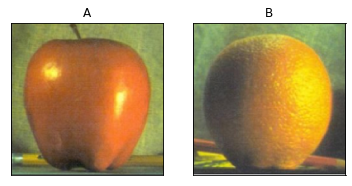

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_1 = cv2.imread('apple.png')
img_2 = cv2.imread('orange.png')
## 注意图像的大小要能被64整除，因为我们要做6层
A = img_1[:448,:448,:]
B = img_2[:448,:448,:]

print(A.shape)
print(B.shape)
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(A,cv2.COLOR_BGR2RGB))
plt.title('A'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(B,cv2.COLOR_BGR2RGB))
plt.title('B'),plt.xticks([]),plt.yticks([])
plt.show()

<font color=blue size=3>**第二步：生成A图像的高斯金字塔图像**</font>

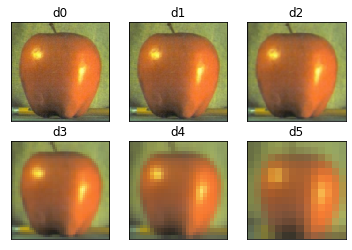

In [35]:
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
img = ['d1','d2','d3','d4','d5']
plt.subplot(2,3,1),plt.imshow(cv2.cvtColor(gpA[0],cv2.COLOR_BGR2RGB))
plt.title('d0'),plt.xticks([]),plt.yticks([])
for i in range(5):
    G = cv2.pyrDown(G)
    gpA.append(G)
    plt.subplot(2,3,i+2),plt.imshow(cv2.cvtColor(gpA[i+1],cv2.COLOR_BGR2RGB))
    plt.title(img[i]),plt.xticks([]),plt.yticks([])

plt.show()

<font color=blue size=3>**第二步：生成B图像的高斯金字塔图像**</font>

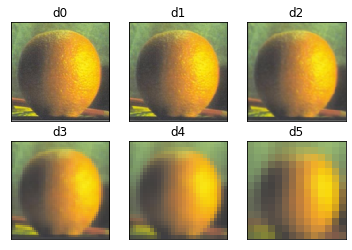

In [36]:
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
img = ['d1','d2','d3','d4','d5']
plt.subplot(2,3,1),plt.imshow(cv2.cvtColor(gpB[0],cv2.COLOR_BGR2RGB))
plt.title('d0'),plt.xticks([]),plt.yticks([])
for i in range(5):
    G = cv2.pyrDown(G)
    gpB.append(G)
    plt.subplot(2,3,i+2),plt.imshow(cv2.cvtColor(gpB[i+1],cv2.COLOR_BGR2RGB))
    plt.title(img[i]),plt.xticks([]),plt.yticks([])

plt.show()

<font color=blue size=3>**第三步：生成A图像的拉普拉斯金字塔图像，注意使用cv2.subtract(gpA[i-1],GE),负数的地方会变为0**</font>

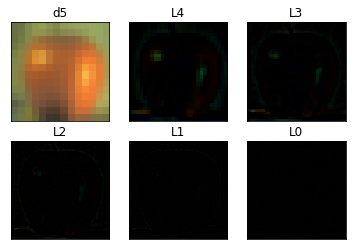

In [38]:
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
plt.subplot(2,3,1),plt.imshow(cv2.cvtColor(lpA[0],cv2.COLOR_BGR2RGB))
plt.title('d5'),plt.xticks([]),plt.yticks([])
img = ['L0','L1','L2','L3','L4']
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    plt.subplot(2,3,6-i+1),plt.imshow(cv2.cvtColor(L,cv2.COLOR_BGR2RGB))
    plt.title(img[i-1]),plt.xticks([]),plt.yticks([])
plt.show()

<font color=blue size=3>**第四步：生成B图像的拉普拉斯金字塔图像，注意使用cv2.subtract(gpA[i-1],GE),负数的地方会变为0**</font>

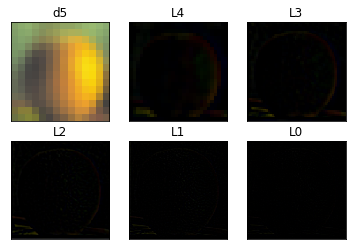

In [40]:
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
plt.subplot(2,3,1),plt.imshow(cv2.cvtColor(lpB[0],cv2.COLOR_BGR2RGB))
plt.title('d5'),plt.xticks([]),plt.yticks([])
img = ['L0','L1','L2','L3','L4']
for i in range(5,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
    plt.subplot(2,3,6-i+1),plt.imshow(cv2.cvtColor(L,cv2.COLOR_BGR2RGB))
    plt.title(img[i-1]),plt.xticks([]),plt.yticks([])
plt.show()

<font color=blue size=3>**第五步：在每一层添加左半边和右半边(作为差值，在第六步中逐步添加)**</font>

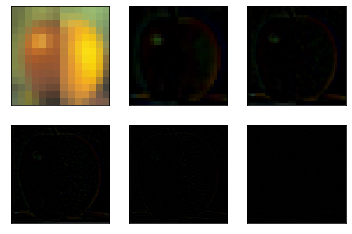

In [46]:
# Now add left and right halves of images in each level
#numpy.hstack(tup)
#Take a sequence of arrays and stack them horizontally
#to make a single array.
LS = []
i = 1
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)
    plt.subplot(2,3,i),plt.imshow(cv2.cvtColor(ls,cv2.COLOR_BGR2RGB))
    plt.xticks([]),plt.yticks([])
    i+=1
plt.show()

<font color=blue size=3>**第六步：现在重建**</font>

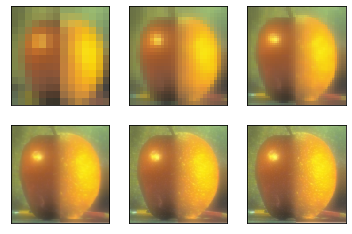

In [47]:
# now reconstruct
ls_ = LS[0]
plt.subplot(2,3,1),plt.imshow(cv2.cvtColor(ls_,cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
for i in range(1,6):
    ls_ = cv2.pyrUp(ls_)    # 加零，高斯模糊
    ls_ = cv2.add(ls_, LS[i]) # 加差值，提高分辨率
    plt.subplot(2,3,i+1),plt.imshow(cv2.cvtColor(ls_,cv2.COLOR_BGR2RGB))
    plt.xticks([]),plt.yticks([])
plt.show()

<font color=blue size=3>**第七步：对比直接连接各一半的图像**</font>

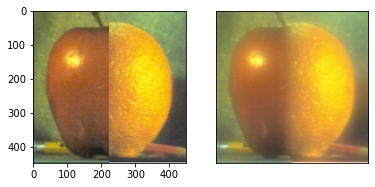

In [49]:
# image with direct connecting each half
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))

plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(real,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(ls_,cv2.COLOR_BGR2RGB))
plt.xticks([]),plt.yticks([])
plt.show()